<a href="https://colab.research.google.com/github/n8mcdunna/Traffic_stops/blob/master/Monday/Unit_1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variables/Names
Month 1-12  (Month)
Reason for Stop  (RsnStop)
Officer Race  (OffRace)
Officer Male   (OffMale)
Officer Years Service   (OffYrsSrv)
Driver Race   (DrvRace)
Driver Hispanic  (DrvHisp)
Driver Male   (DrvMale)
Driver Age  (DrvAge)
Search Vehicle (SrchVhcl)
Result of Stop (RsltStop)


Levels for non-dichotomous variables
###Reason for Stop:  
###1=CheckPoint, 2=DWI, 3=Investigation, 4=Other, 5=Safe Movement, 6=SeatBelt, 7=Speeding, 8=StopLight/Sign, 9=VehicleMovement, 10=VehicleRegistry
###Officer race: Blank=NotSpecified, 1=AmericanIndian/NativeAlaska/Hawaii, 2=Asian/PacificIslander, 3=Black/AfricanAmerican, 4=Hispanic/Latino, 5=White
###Driver Race: 1=Asian, 2=Black, 3=NativeAmerican,4=Other/Unknown,5=White
###Result of Stop: 1=NoActionTaken, 2=VerbalWarning,3=WrittenWarning, 4=Citation, 5=Arrest

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [49]:
df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/trafficstop.csv')

In [ ]:
# Description of data http://users.stat.ufl.edu/~winner/data/trafficstop.txt

In [50]:
df.columns = ['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Officer Years of Service', 'Driver Race', 'Driver Hispanic', 
              'Driver Gender', 'Driver Age', 'Search of Vehicle', 'Result of Stop']

In [52]:
df['Officer Race'] = df['Officer Race'].replace(np.nan, 6) # replacing NaNs in officer race with 6. NaN did stand for undefined

In [142]:
cat_variables = df.loc[:,['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Driver Race', 'Driver Hispanic', 'Driver Gender', 'Search of Vehicle', 'Result of Stop']]
num_variables = df.loc[:,['Officer Years of Service', 'Driver Age']]

In [53]:
df.head()

,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop
0,8,8,3.0,0,22,2,2,1,40,0,2
1,1,8,5.0,1,18,2,2,1,26,1,4
2,1,8,5.0,1,18,2,2,0,25,0,2
3,11,7,3.0,0,23,5,1,1,41,0,2
4,12,7,3.0,0,23,5,2,1,53,0,2


In [5]:
df.shape

(79884, 11)

In [9]:
df.head()

,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop
0,8,8,3.0,0,22,2,2,1,40,0,2
1,1,8,5.0,1,18,2,2,1,26,1,4
2,1,8,5.0,1,18,2,2,0,25,0,2
3,11,7,3.0,0,23,5,1,1,41,0,2
4,12,7,3.0,0,23,5,2,1,53,0,2


In [59]:
df['Driver Hispanic'].value_counts()

2    72306
1     7578
Name: Driver Hispanic, dtype: int64

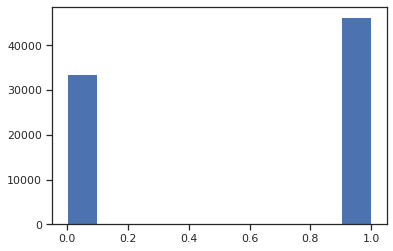

In [75]:
plt.hist(df['Driver Gender'])
plt.show()

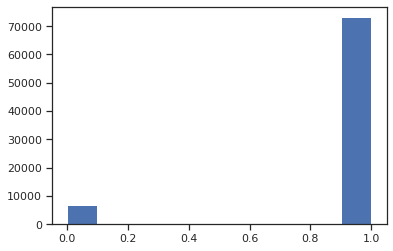

In [180]:
plt.hist(df['Officer Gender'])
plt.show()

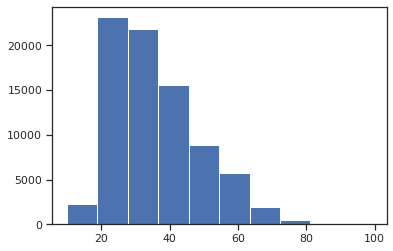

In [77]:
plt.hist(df['Driver Age'])
plt.show()

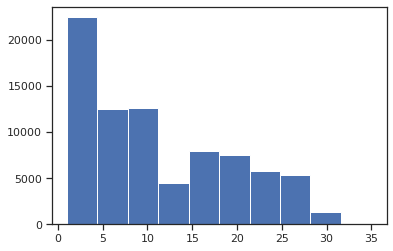

In [78]:
plt.hist(df['Officer Years of Service'])
plt.show()

In [61]:
df['Driver Race'].value_counts()

2    42970
5    32969
4     2422
1     1461
3       62
Name: Driver Race, dtype: int64

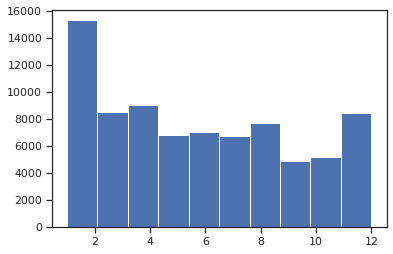

In [16]:
plt.hist(df['Month'])
plt.show()

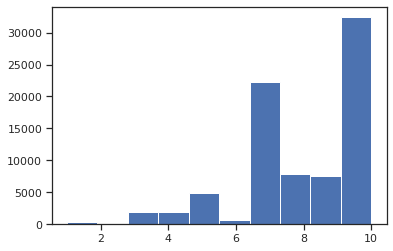

In [17]:
plt.hist(df['Reason for Stop'])
plt.show()

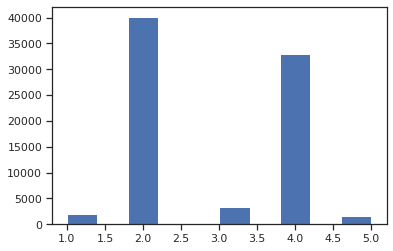

In [32]:
plt.hist(df['Result of Stop'])
plt.show()

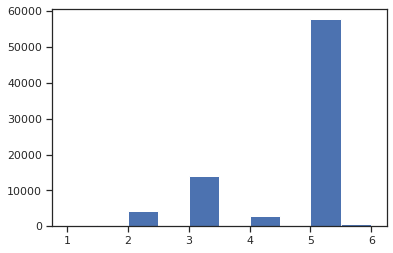

In [58]:
plt.hist(df['Officer Race'])
plt.show()

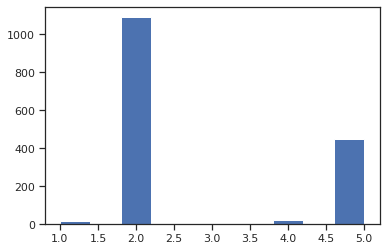

In [56]:
arrests = df[df['Result of Stop'] == 5]
plt.hist(arrests['Driver Race'])
plt.show()

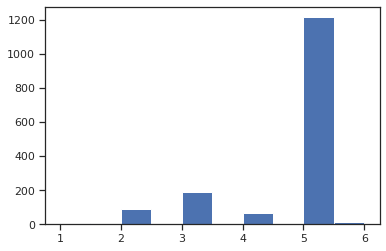

In [57]:
plt.hist(arrests['Officer Race'])
plt.show()

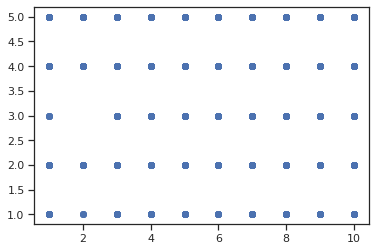

In [22]:
plt.scatter(df['Reason for Stop'], df['Result of Stop'])
plt.show()

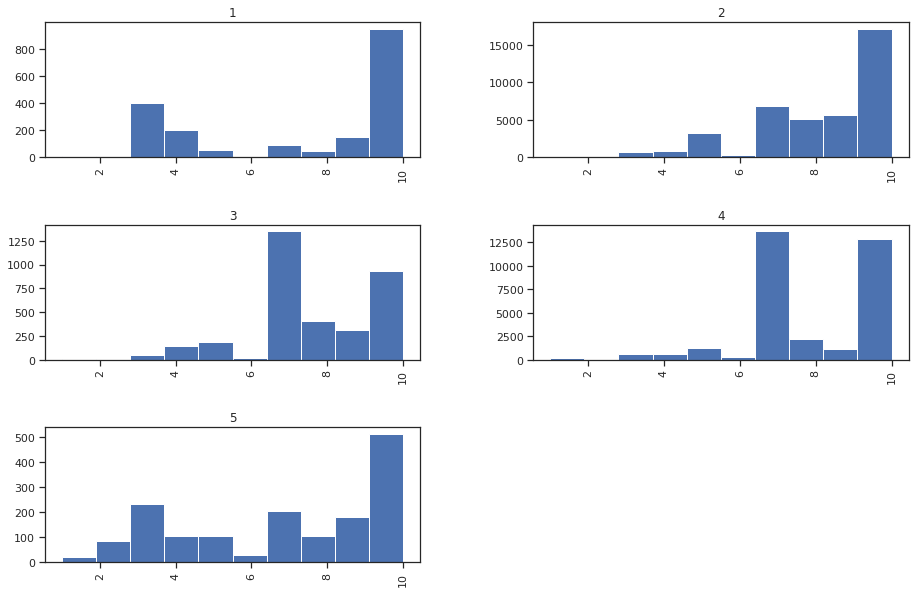

In [28]:
df['Reason for Stop'].hist(by = df['Result of Stop'], figsize = (15,10));

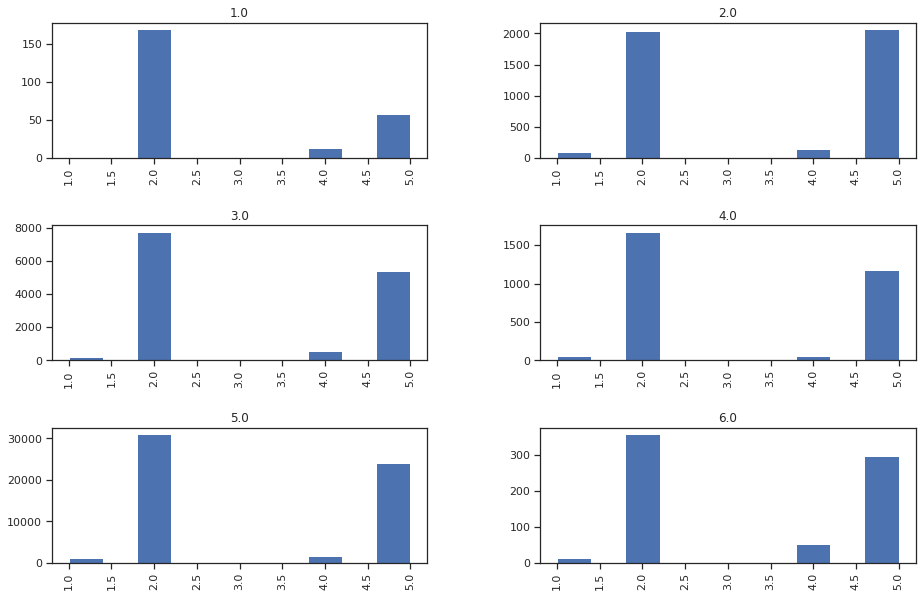

In [63]:
df['Driver Race'].hist(by = df['Officer Race'], figsize = (15,10));


Officer Race,1.0,2.0,3.0,4.0,5.0,6.0
Driver Race,,,,,,
1,0.068446,6.707734,15.195072,3.627652,73.374401,1.026694
2,0.393298,4.740517,18.017221,3.893414,72.127065,0.828485
3,0.000000,3.225806,30.645161,4.838710,59.677419,1.612903
4,0.536746,6.028076,22.460776,2.477291,66.350124,2.146986
5,0.175923,6.266493,16.254663,3.566987,72.835088,0.900846
All,0.301687,5.444144,17.382705,3.711632,72.257273,0.902559


In [72]:
g, p_value, dof, expected = chi2_contingency(pd.crosstab(df['Driver Age'], df['Officer Years of Service']))
p_value

0.0

In [74]:
pd.crosstab(df['Driver Age'], df['Officer Race'], margins= True, normalize= 'index') * 100


Officer Race,1.0,2.0,3.0,4.0,5.0,6.0
Driver Age,,,,,,
10,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
13,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
14,0.000000,0.000000,66.666667,0.000000,33.333333,0.000000
15,0.000000,0.000000,3.225806,6.451613,90.322581,0.000000
...,...,...,...,...,...,...
91,0.000000,0.000000,0.000000,33.333333,66.666667,0.000000
92,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
93,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000


In [ ]:
#sns.set(style="ticks", color_codes=True)
g = sns.PairGrid(df, hue= 'Driver Race')
g.map(sns.scatterplot)
#sns.pairplot(df)

In [85]:
pd.crosstab(df['Month'], df['Search of Vehicle'], margins= True, normalize= 'index') * 100

Search of Vehicle,0,1
Month,,
1,95.557618,4.442382
2,95.763256,4.236744
3,95.785396,4.214604
4,96.004415,3.995585
5,95.199883,4.800117
6,96.271090,3.728910
7,96.010049,3.989951
8,96.173304,3.826696
9,96.620117,3.379883


In [150]:
def chi_square(column_name):
  results = [(column, chi2_contingency(pd.crosstab(cat_variables[column], cat_variables[column_name]))[1]) for column in cat_variables.columns]
  results = pd.DataFrame(results)
  results.columns = ['Variable', 'p-value']
  results = results.sort_values(by= ['p-value'])
  return results

In [151]:
chi_square('Reason for Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
4,Driver Race,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
5,Driver Hispanic,1.239846e-139
2,Officer Race,1.467362e-133
0,Month,5.973070e-127
3,Officer Gender,3.315326e-125
6,Driver Gender,1.074974e-77


In [152]:
chi_square('Result of Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
2,Officer Race,2.701179e-261
6,Driver Gender,5.981797e-87
4,Driver Race,1.027880e-83
0,Month,5.788958e-54
5,Driver Hispanic,4.732458e-47
3,Officer Gender,6.830459e-11


In [155]:
chi_square('Search of Vehicle')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
6,Driver Gender,1.137851e-195
4,Driver Race,5.338474e-160
2,Officer Race,2.020537e-28
3,Officer Gender,4.963004e-08
5,Driver Hispanic,1.837276e-04
0,Month,1.871583e-03


10    32405
7     22222
8      7946
9      7535
5      4827
3      1992
4      1926
6       631
1       286
2       114
Name: Reason for Stop, dtype: int64

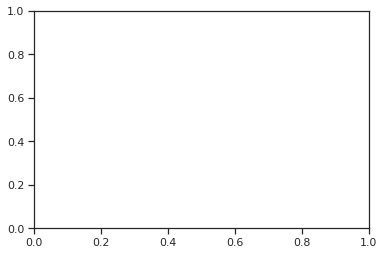

In [156]:


df['Reason for Stop'].value_counts()  

In [160]:
df['Reason for Stop'].values

array([ 8,  8,  8, ...,  7, 10,  9])

In [161]:
for reason in df['Reason for Stop'].value_counts():
  print(reason)

32405
22222
7946
7535
4827
1992
1926
631
286
114


In [181]:
df2 = pd.crosstab(df['Reason for Stop'], df['Result of Stop'])

In [209]:
df2[1]

Reason for Stop
1       9
2       3
3     402
4     200
5      55
6       6
7      92
8      47
9     149
10    951
Name: 1, dtype: int64

In [176]:
df2.columns

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Result of Stop')

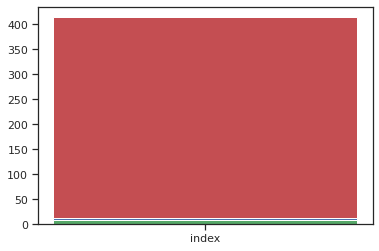

In [208]:
fig, ax = plt.subplots()
foundation = 0
rect = ax.bar(x= 'index', bottom= foundation, height= df2[1][1], width= 0.3, color= 'g')
foundation += df2[1][1]
rect = ax.bar(x= 'index', bottom= foundation, height= df2[1][2], width= 0.3, color= 'b')
foundation += df2[1][2]
rect = ax.bar(x= 'index', bottom = foundation, height= df2[1][3], width= 0.3, color= 'r')


plt.show();